In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [4]:
url="https://www.flipkart.com/search?q=iphone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
session = requests.Session()
session.headers.update({
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.63 Safari/537.36",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.5",
    "Referer": "https://www.flipkart.com/"
})

response = session.get(url)
print(response.status_code)



200


In [6]:
soup=BeautifulSoup(response.text,"lxml")  #will retrieve html data from page1
box=soup.find("div",class_="DOjaWF gdgoEp")
#soup
product_name=[]
Price=[]
review=[]
description=[]

In [8]:
names=box.find_all("div",class_="KzDlHZ")
for i in names:
    name=i.text
    product_name.append(name)
product_name
len(product_name)

24

In [10]:
prices=box.find_all("div",class_="Nx9bqj _4b5DiR")
for i in prices:
    name=i.text
    Price.append(name)
len(Price)

24

In [12]:
reviews=box.find_all("div",class_="XQDdHH")
for i in reviews:
    name=i.text
    review.append(name)
len(review)

24

In [14]:
data=pd.DataFrame({"Product_name":product_name,"Prices":Price,"review":review})
data

,Product_name,Prices,review
0,"Apple iPhone 15 (Blue, 128 GB)","₹57,999",4.6
1,"Apple iPhone 15 Plus (Blue, 128 GB)","₹65,999",4.6
2,"Apple iPhone 15 (Pink, 128 GB)","₹57,999",4.6
3,"Apple iPhone 15 (Black, 128 GB)","₹57,999",4.6
4,"Apple iPhone 15 (Green, 128 GB)","₹57,999",4.6
5,"Apple iPhone 15 Plus (Black, 128 GB)","₹65,999",4.6
6,"Apple iPhone 15 Plus (Green, 128 GB)","₹65,999",4.6
7,"Apple iPhone 15 Plus (Pink, 128 GB)","₹65,999",4.6
8,"Apple iPhone 15 (Blue, 256 GB)","₹67,999",4.6
9,"Apple iPhone 15 Plus (Black, 256 GB)","₹75,999",4.6


In [16]:
data.columns.values

array(['Product_name', 'Prices', 'review'], dtype=object)

In [18]:
# def save_to_csv(reviews, file_name="flipkart_reviews.csv"):
#     with open(file_name, mode='w', newline='', encoding='utf-8') as file:
#         writer = csv.writer(file)
#         writer.writerow(["Review", "Rating"])
#         writer.writerows(reviews)

# # Example usage
# if __name__ == "__main__":
#     product_url = "https://www.flipkart.com/apple-iphone-15-black-128-gb/p/itm6ac6485515ae4"  # Update this with actual product URL
#     reviews = fetch_reviews(product_url)
#     save_to_csv(reviews)

In [20]:
data['review len']=data['review'].apply(len)
data['product len']=data["Product_name"].apply(len)
data.head()
data.iloc[10]

Product_name    Apple iPhone 15 (Black, 256 GB)
Prices                                  ₹67,999
review                                      4.6
review len                                    3
product len                                  31
Name: 10, dtype: object

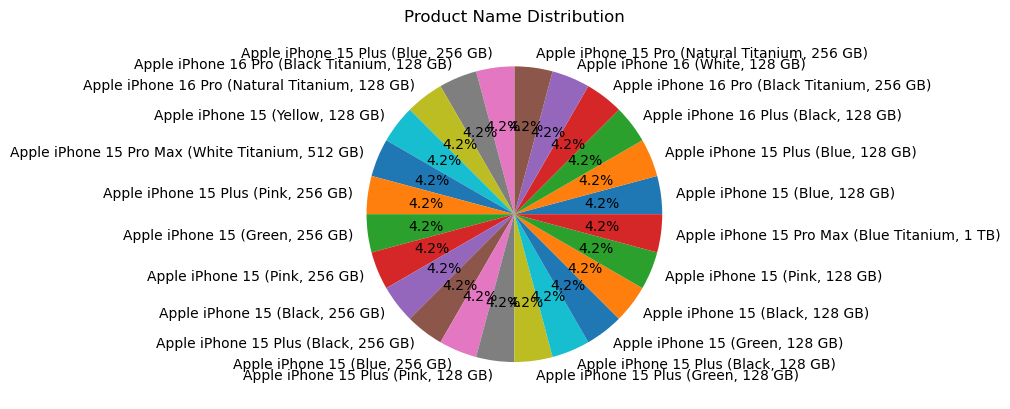

In [22]:
import matplotlib.pyplot as plt

data["Product_name"].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')  # Optional: to remove the default y-label
plt.title('Product Name Distribution')  # Optional: to set a title
plt.show()

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [55]:
#pip install spacy
#pip install wordcloud #Get insight into the most popular concepts or to reveal sentiment. It provides instant analysis & visualization of word data and feedback. It engages & sparks excitement among participants.
#!pip install textblob #TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

SyntaxError: invalid syntax (1908725273.py, line 1)

In [43]:
data = pd.read_csv("flipkart.csv")
print(data.head())

   Unnamed: 0                                       Product_name  \
0           0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1           1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2           2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3           3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4           4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  Best under 60k Great performanceI got it for a...       5  
1                                 Good perfomence...       5  
2  Great performance but usually it has also that...       5  
3           My wife is so happy and best product 👌🏻😘       5  
4  Light weight laptop with new amazing features,...       5  


In [57]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

In [ ]:
### 1. **Importing Libraries**
   - **`import pandas as pd`**: This imports the `pandas` library, a powerful data manipulation tool used for handling structured data in tables or DataFrames.
   - **`import numpy as np`**: This imports `NumPy`, a fundamental package for performing numerical operations, particularly on arrays and matrices.
   - **`from textblob import TextBlob`**: Imports `TextBlob`, a library used for natural language processing (NLP) tasks like sentiment analysis, part-of-speech tagging, noun phrase extraction, etc.
   - **`from wordcloud import WordCloud`**: Imports the `WordCloud` module to generate word clouds, which are visual representations of the most frequent words in a text.
   - **`import re`**: The `re` module is used for regular expressions, helpful for text cleaning and pattern matching in strings.
   - **`import matplotlib.pyplot as plt`**: Imports `matplotlib.pyplot`, a library for creating static, animated, and interactive visualizations in Python. Here, it’s used for plotting graphs.
   - **`import seaborn as sns`**: Imports `seaborn`, a statistical data visualization library built on top of `matplotlib`. It makes complex visualizations easy to generate.
   - **`plt.style.use('fivethirtyeight')`**: Sets the plotting style to `fivethirtyeight`, a popular aesthetic theme for `matplotlib` plots that makes the visuals more appealing.
   
### 2. **Text Processing Libraries**
   - **`import nltk`**: Imports the `nltk` (Natural Language Toolkit), one of the most widely-used libraries for NLP. It contains tools like tokenizers, stemmers, and stop words.
   - **`from nltk.stem.snowball import SnowballStemmer`**: Imports `SnowballStemmer`, a tool for stemming words. Stemming is the process of reducing words to their base or root form (e.g., "running" becomes "run").
   - **`from nltk.corpus import stopwords`**: Imports `stopwords` from NLTK. Stopwords are common words (like “and”, “the”, “is”) that are often removed from text because they don’t add much meaning.
   
### 3. **Loading SpaCy for NLP**
   - **`import spacy`**: Imports `spacy`, another popular library for NLP. SpaCy provides advanced features like part-of-speech tagging, named entity recognition (NER), and dependency parsing.
   - **`nlp = spacy.load("en_core_web_sm")`**: Loads the SpaCy model `en_core_web_sm`, a small model for processing English text. This model includes tokenization, POS tagging, and NER for English.

### **Purpose of the Code**
- **Text Analysis & Sentiment Analysis**: By importing `TextBlob`, `nltk`, and `spacy`, the code is setting up an environment to analyze text data, perform sentiment analysis, and extract important features from text (e.g., named entities, parts of speech).
- **Data Cleaning & Preprocessing**: With tools like `re`, `SnowballStemmer`, and `stopwords`, this code allows for preprocessing the text, including removing unwanted characters, stemming, and eliminating stopwords.
- **Visualization**: Using `matplotlib`, `seaborn`, and `WordCloud`, the code enables the visualization of data trends, distributions, and word frequency (through word clouds).


In [65]:
#clean the reviews with a function
def cleanReviews(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('https?:\/\/\S+', '', text)  #removes https
    text = re.sub('\n',' ',text) #removes new line
    text = re.sub(r'www\S+', " ", text) #removes www
    text = re.sub(r'\.|/|:|-', " ", text)
    text = re.sub(r'[^\w\s]','',text)
    return text
data['cleanedReviews'] = data['Review'].apply(cleanReviews) #apply cleanReviews function to the Reviews
data.head() #compares original reviews with cleaned Reviews

<>:5: SyntaxWarning:

invalid escape sequence '\/'

<>:5: SyntaxWarning:

invalid escape sequence '\/'

/var/folders/w2/vvwy8qk113nfkf5n41nqqnvh0000gn/T/ipykernel_58972/3387074283.py:5: SyntaxWarning:

invalid escape sequence '\/'



,Unnamed: 0,Product_name,Review,Rating,cleanedReviews
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5,Best under 60k Great performanceI got it for a...
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5,Good perfomence
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5,Great performance but usually it has also that...
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5,My wife is so happy and best product
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5,Light weight laptop with new amazing features ...


<BarContainer object of 5 artists>

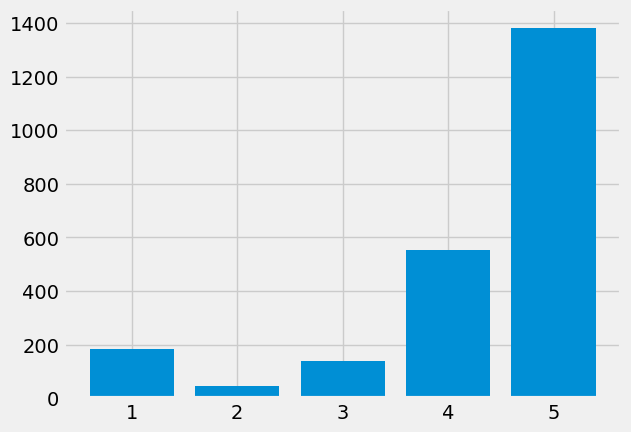

In [69]:
x=[5,4,1,3,2]
plt.bar(x,data['Rating'].value_counts())

In [71]:
def getAnalysis(rating):
    if rating<3:
        return 'Negative'
    elif rating ==3:
        return 'Neutral'
    else:
        return 'Positive'
    
df1['Analysis'] = df1['Rating'].apply(getAnalysis)

df1

/var/folders/w2/vvwy8qk113nfkf5n41nqqnvh0000gn/T/ipykernel_58972/2795319424.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cleanedReviews,Rating,Analysis
0,Best under 60k Great performanceI got it for a...,5,Positive
1,Good perfomence,5,Positive
2,Great performance but usually it has also that...,5,Positive
3,My wife is so happy and best product,5,Positive
4,Light weight laptop with new amazing features ...,5,Positive
...,...,...,...
2299,Great display accurate colours at this price r...,5,Positive
2300,Superb monitor first brought 1 used for 2 mont...,5,Positive
2301,Awesome,5,Positive
2302,Only one issue with adapter,5,Positive


In [73]:

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
df1['Subjectivity'] = df1['cleanedReviews'].apply(getSubjectivity)
df1['Polarity'] = df1['cleanedReviews'].apply(getPolarity)

/var/folders/w2/vvwy8qk113nfkf5n41nqqnvh0000gn/T/ipykernel_58972/1472177350.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
df1['Analysis2'] = df1['Polarity'].apply(getAnalysis)

df1

,cleanedReviews,Rating,Analysis,Subjectivity,Polarity,Analysis2
0,Best under 60k Great performanceI got it for a...,5,Positive,0.472424,0.438788,Positive
1,Good perfomence,5,Positive,0.600000,0.700000,Positive
2,Great performance but usually it has also that...,5,Positive,0.666667,0.183333,Positive
3,My wife is so happy and best product,5,Positive,0.650000,0.900000,Positive
4,Light weight laptop with new amazing features ...,5,Positive,0.763636,0.534091,Positive
...,...,...,...,...,...,...
2299,Great display accurate colours at this price r...,5,Positive,0.691667,0.600000,Positive
2300,Superb monitor first brought 1 used for 2 mont...,5,Positive,0.666667,0.625000,Positive
2301,Awesome,5,Positive,1.000000,1.000000,Positive
2302,Only one issue with adapter,5,Positive,1.000000,0.000000,Neutral


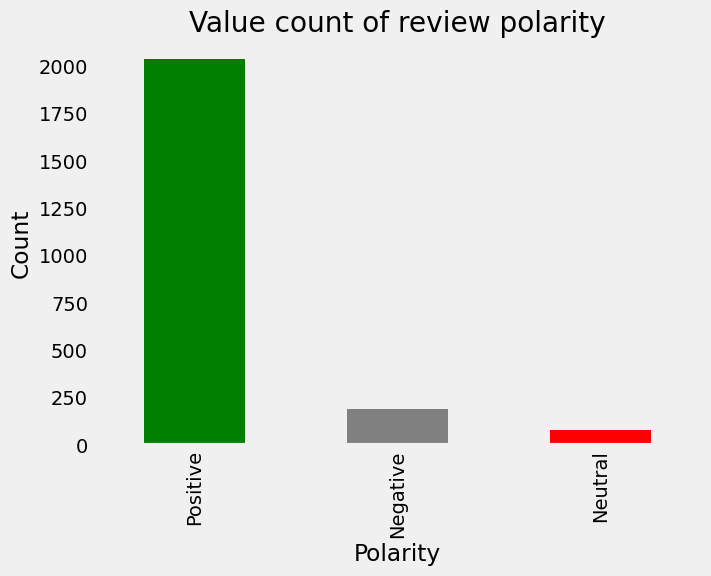

In [77]:
# Plot a bar graph and pie chart for each polarity

#plot a bar graph to show count of review sentiment
fig = plt.figure(figsize=(7,5))
color = ['green','grey','red']
df1['Analysis2'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of review polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Distribution of polarity')

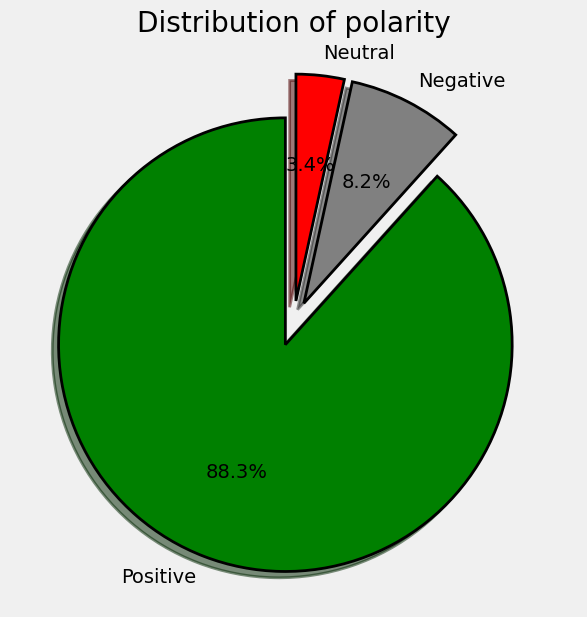

In [79]:
fig = plt.figure(figsize=(7,7))
colors = ('green', 'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df1['Analysis2'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')

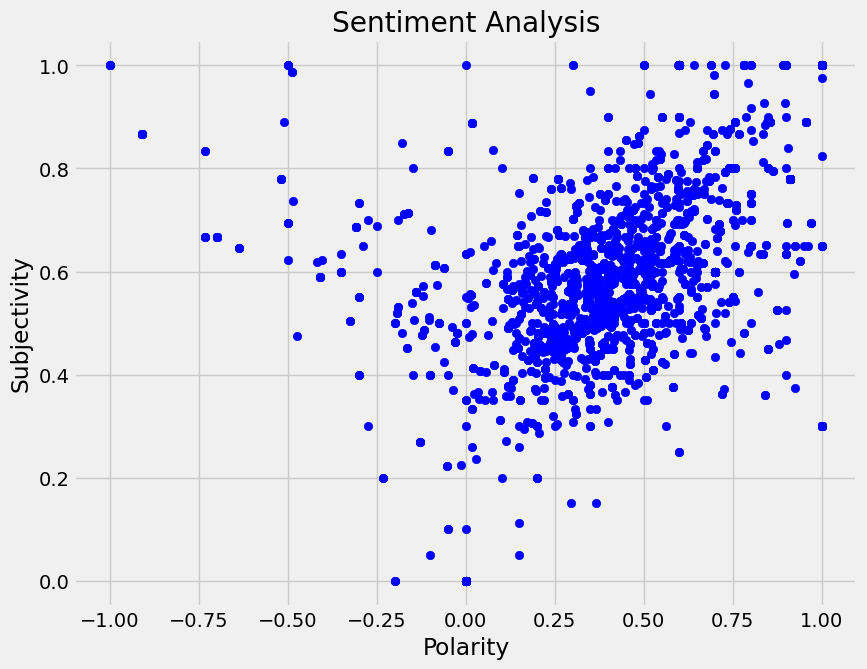

In [82]:
#plot the polarity and subjectivity on a scatter plot
plt.figure(figsize=(9,7))
for i in range(0,df1.shape[0]):
    plt.scatter(df1['Polarity'][i],df1['Subjectivity'][i], color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

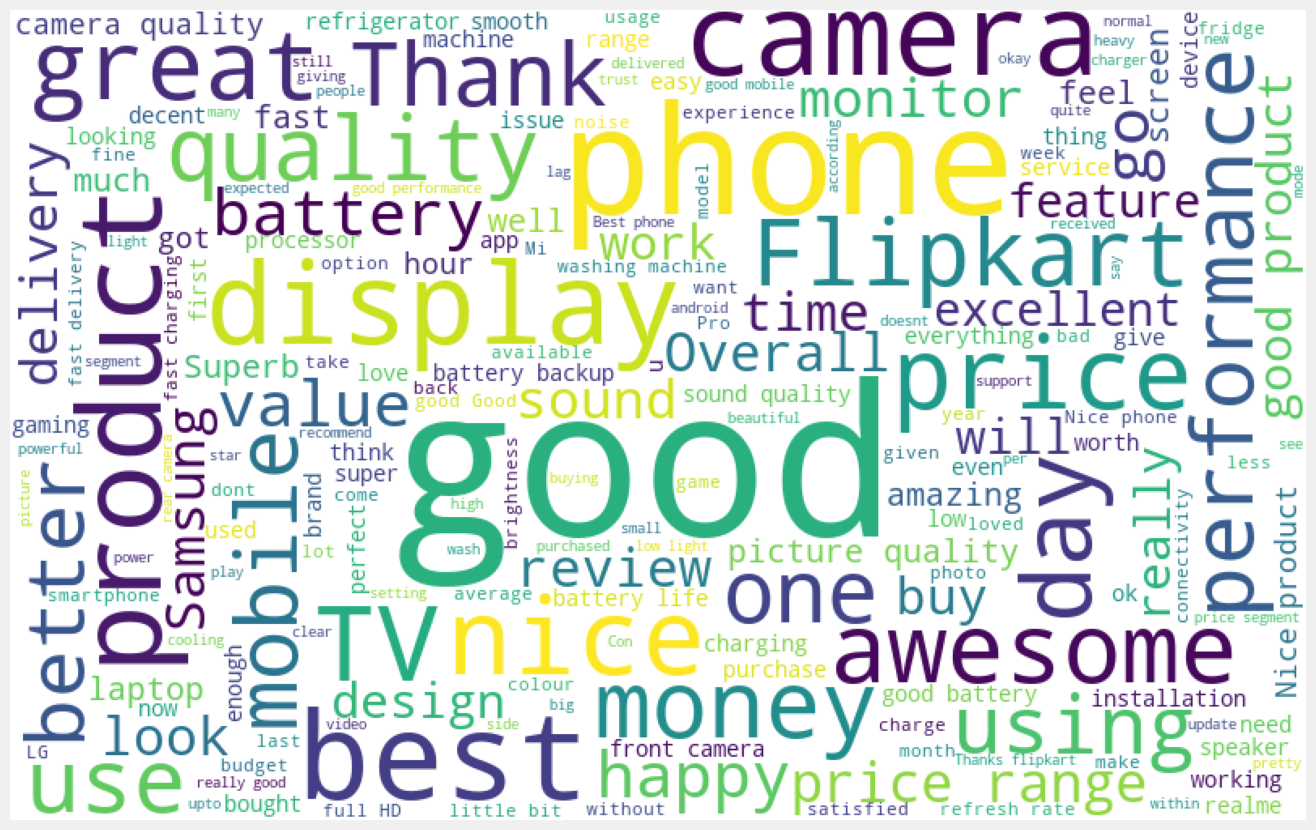

In [84]:
def create_wordcloud(text):    
    allWords = ' '.join([x for x in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
#wordcloud for positive reviews
posReviews = df1.loc[df1['Analysis2']=='Positive', 'cleanedReviews']
create_wordcloud(posReviews)

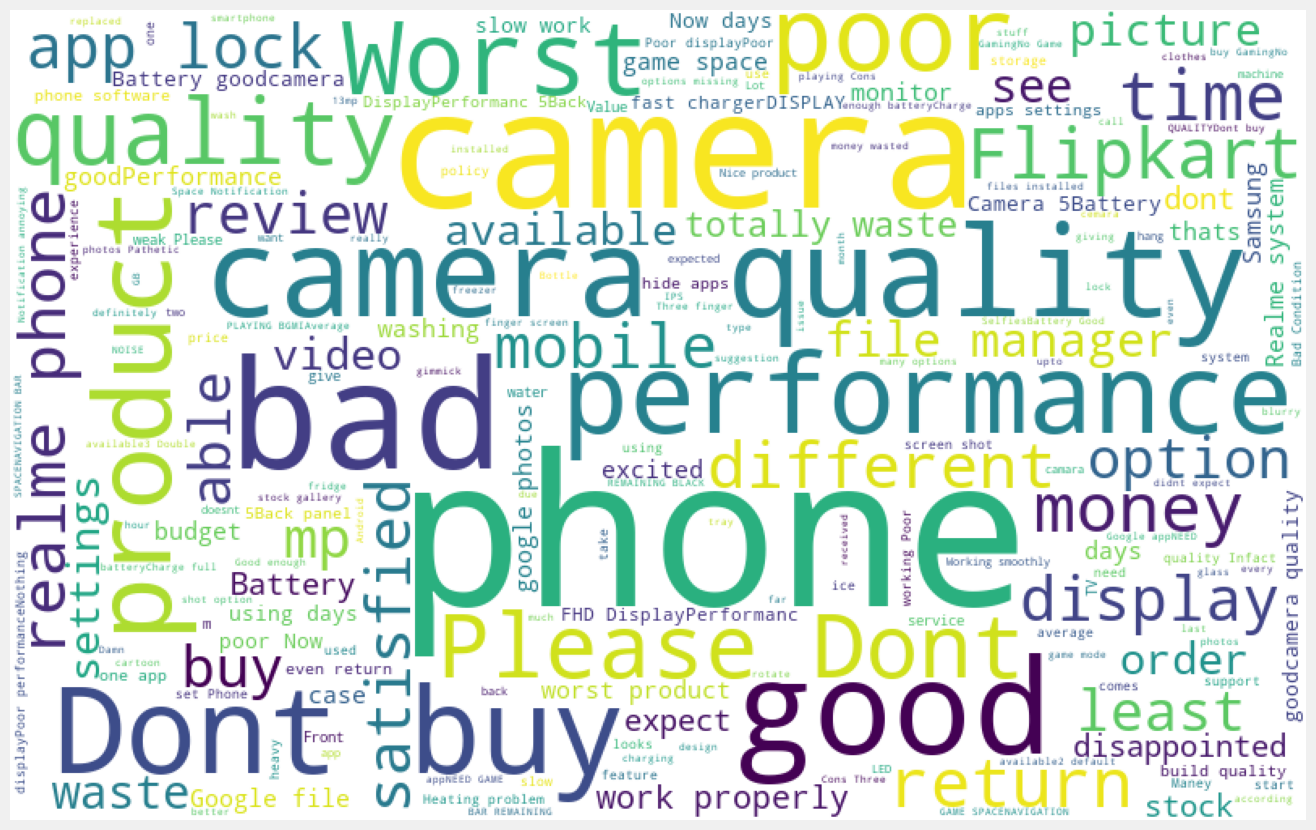

In [88]:
#wordcloud for negative reviews
negReviews = df1.loc[df1['Analysis2']=='Negative', 'cleanedReviews']
create_wordcloud(negReviews)